In [1]:
from framefinder import framedimensions
base_model = "all-mpnet-base-v2"
dimensions = [
    "Care: ...acted with kindness, compassion, or empathy, or nurtured another person.",
    "Harm: ...acted with cruelty, or hurt or harmed another person/animal and caused suffering.",
    "Fairness: ...acted in a fair manner, promoting equality, justice, or rights.",
    "Cheating: ...was unfair or cheated, or caused an injustice or engaged in fraud.",
    "Loyalty: ...acted with fidelity, or as a team player, or was loyal or patriotic.",
    "Betrayal: ...acted disloyal, betrayed someone, was disloyal, or was a traitor.",
    "Authority: ...obeyed, or acted with respect for authority or tradition.",
    "Subversion: ...disobeyed or showed disrespect, or engaged in subversion or caused chaos.",
    "Sanctity: ...acted in a way that was wholesome or sacred, or displayed purity or sanctity.",
    "Degredation: ...was depraved, degrading, impure, or unnatural.",
]
pole_names = [
    ("Care", "Harm"),
    ("Fairness", "Cheating"),
    ("Loyalty", "Betrayal"),
    ("Authority", "Subversion"),
    ("Sanctity", "Degredation"),
]
framing_dimensions = framedimensions.FramingDimensions(
    base_model, dimensions, pole_names
)


In [5]:
import os
import numpy as np
import pandas as pd

def merge_csvs(directory):
    assert(os.path.exists(directory))
    files = [f for f in os.listdir(directory) if f.endswith(".csv")]
    assert(files)

    dfs = []
    for file in files:
        file_path = os.path.join(directory, file)
        dfs.append(pd.read_csv(file_path, header=[0, 1]))
    return pd.concat(dfs, axis=0)


def create_histogram(df, thresholds="auto"):
    histogram_df = pd.DataFrame()

    for col in df.columns:  # for each frame dimension
        hist, bin_edges = np.histogram(df[col], bins=thresholds)
        bin_labels = [
            f"{col}_bin_{round(thresholds[i], 2)}" for i in range(1, len(bin_edges))
        ]

        for label, count in zip(bin_labels, hist):
            histogram_df[label] = [count]

    return histogram_df

In [9]:
all_wiki_articles = merge_csvs("./dumps/dimensions")
means = all_wiki_articles.mean()
stds = all_wiki_articles.std()
maxs = all_wiki_articles.max()
mins = all_wiki_articles.min()

for col in all_wiki_articles.columns:
    print(f"Dimension: {col}")
    print(f"\tMean {means[col]}")
    print(f"\tStandard Deviation {stds[col]}")
    print(f"\tMax {maxs[col]}")
    print(f"\tMin {mins[col]}")

Dimension: ('Care', 'Harm')
	Mean -0.007884912083809679
	Standard Deviation 0.06729265389993529
	Max 0.24683169
	Min -0.32374707
Dimension: ('Fairness', 'Cheating')
	Mean 0.02407834801456692
	Standard Deviation 0.06419943492498273
	Max 0.42234373
	Min -0.29139954
Dimension: ('Loyalty', 'Betrayal')
	Mean -0.001134566217036895
	Standard Deviation 0.06142242232080934
	Max 0.29124185
	Min -0.26864973
Dimension: ('Authority', 'Subversion')
	Mean -0.017924446683730156
	Standard Deviation 0.07068418760448537
	Max 0.34075972
	Min -0.27964288
Dimension: ('Sanctity', 'Degredation')
	Mean -0.04704777145180227
	Standard Deviation 0.0754907190046813
	Max 0.2889365
	Min -0.37927735


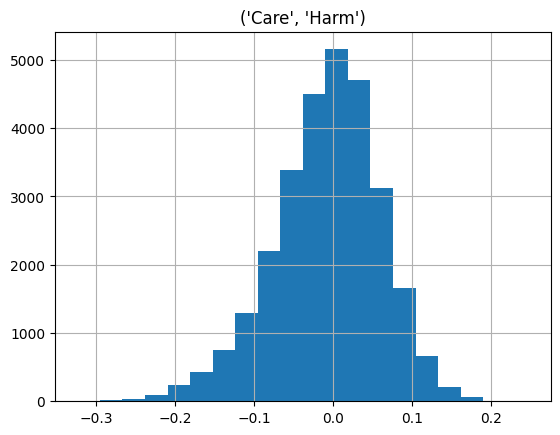

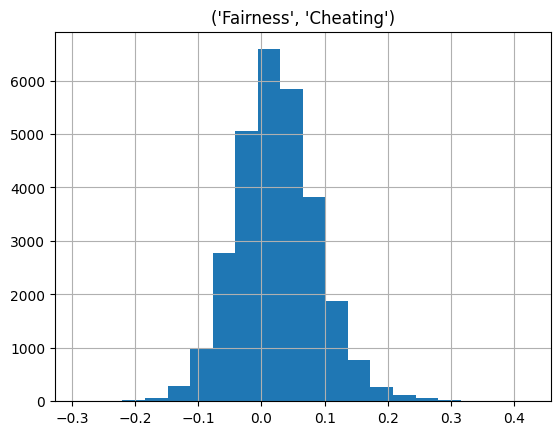

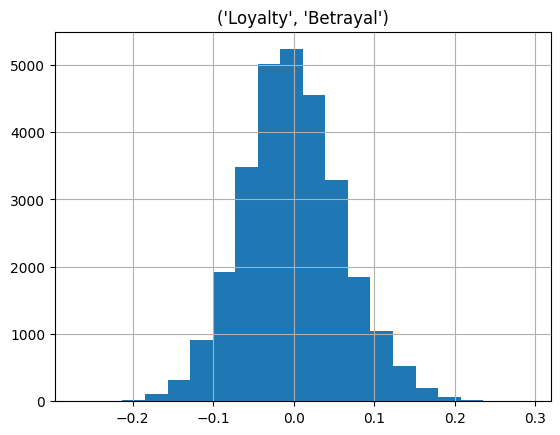

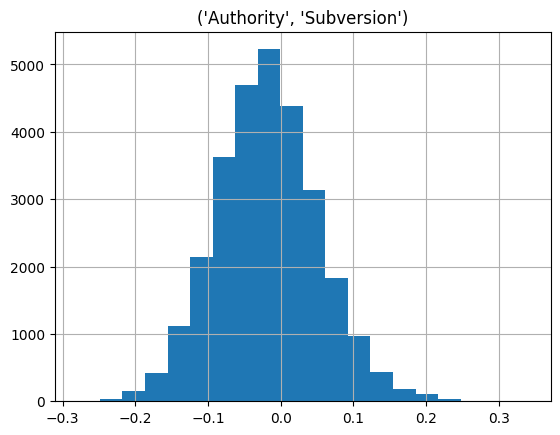

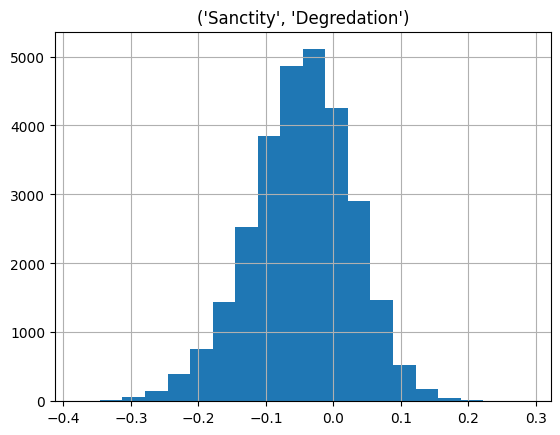

In [10]:
for col in all_wiki_articles.columns:
    all_wiki_articles.hist(column=col, bins=20)

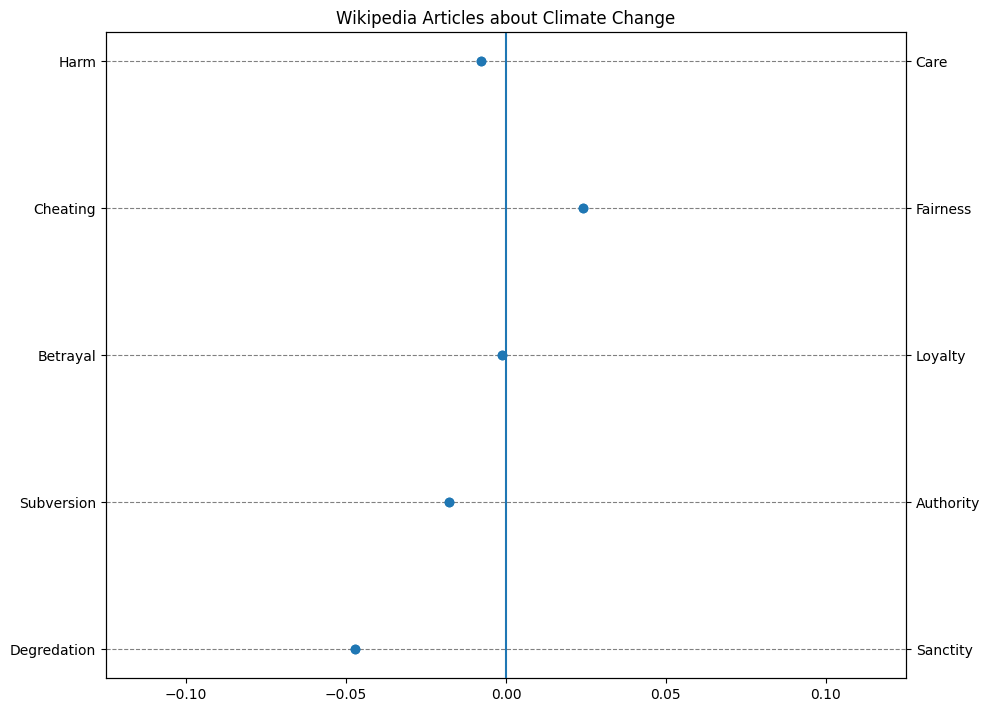

In [16]:

import matplotlib.pyplot as plt

def compare_plots(dfs, title, scale=0.25):
    labels_right, labels_left = zip(*pole_names)
    means = [df.mean() for df in dfs]

    fig, ax1 = plt.subplots() 
    ax2 = ax1.twinx() 
    plt.axvline(0)
    ax1.set_axisbelow(True)
    ax1.yaxis.grid(color="gray", linestyle="dashed")
    plt.xlim(-scale/2, scale/2)
    ax2.scatter(x=means[0], y=labels_right) # only needed for labels on the right
    ax2.plot()
    for i in range(0, len(dfs)):
        ax1.scatter(x=means[i], y=labels_left)

    ax1.invert_yaxis()
    ax2.invert_yaxis()
    plt.gcf().set_size_inches(10, 7)
    plt.tight_layout()
    plt.title(title)
    return fig

fig = compare_plots([all_wiki_articles], title="Wikipedia Articles about Climate Change")
